In [1]:
import pandas as pd
import geopandas as gpd
from pylab import *
import numpy as np

In [2]:
df = pd.read_csv("NFDB_point_txt-reduced/NFDB_point_20220901-reduced.txt")
df['ACQ_DATE']=pd.to_datetime(df['ACQ_DATE'])
df['MONTHINDEX']=(df.YEAR-min(df.YEAR))*12 +df.MONTH

#Let's get rid of negative years since I don't know what that is and I don't want to deal with it

df = df.query("YEAR >=0")

In [3]:
## NOTE - THIS IS A RANDOMLY REDUCED DATASET TO FIT ON GITHUB, THE ACTUAL DATA IS MUCH DIFFERENT AND CAN BE ACCESSED AT:
# https://cwfis.cfs.nrcan.gc.ca/datamart/download/nfdbpnt

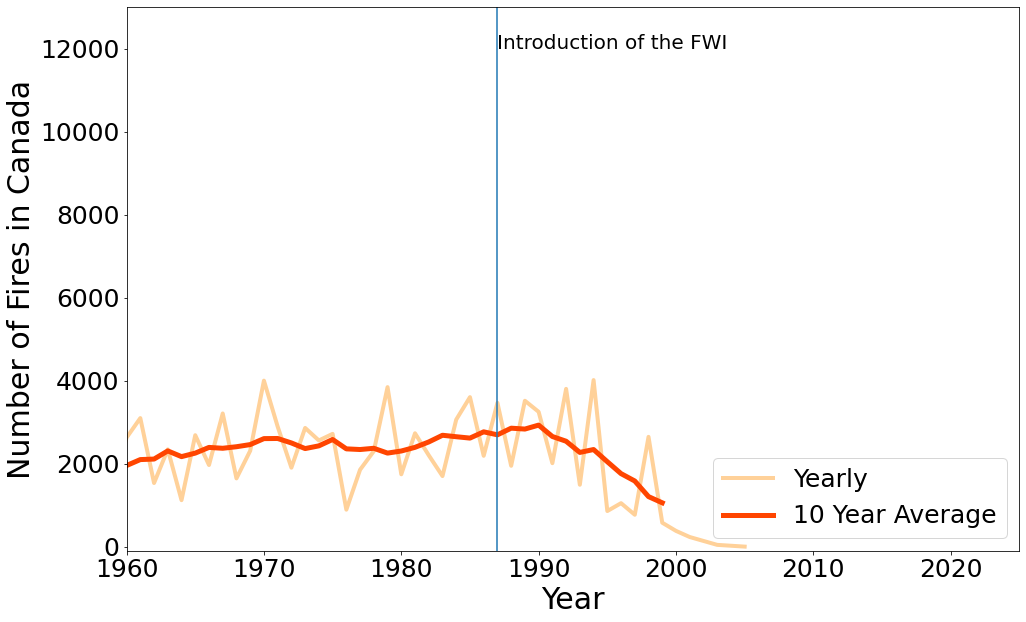

In [4]:
#Ok well first things first... IS the number of fires even increasing year over year
nFiresByYear=df.groupby("YEAR").count()["FID"]
N = len(nFiresByYear)
figure(figsize = (16,10))
a = np.polyfit(df.groupby("YEAR").count().index,nFiresByYear,deg = 2)
plot(df.groupby("YEAR").count().index,nFiresByYear,color = "darkorange",linewidth = 4,alpha = 0.4,label = "Yearly")
#plot(df.groupby("YEAR").count().index,a[2] + df.groupby("YEAR").count().index*a[1] + (df.groupby("YEAR").count().index**2)*a[0])
plot(df.groupby("YEAR").count().index[5:-4],np.convolve(nFiresByYear, np.ones(10)/10, mode='valid'),color = "orangered",linewidth = 5,label = "10 Year Average")
xlabel("Year",fontsize = 30)
ylabel("Number of Fires in Canada",fontsize = 30)

legend(fontsize = 25,loc = "lower right")
axvline(1987)
text(1987,12000, "Introduction of the FWI",fontsize = 20)
xlim(1960,2025)
ylim(-100,13000)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

### Using all the data, the graph looks like this:

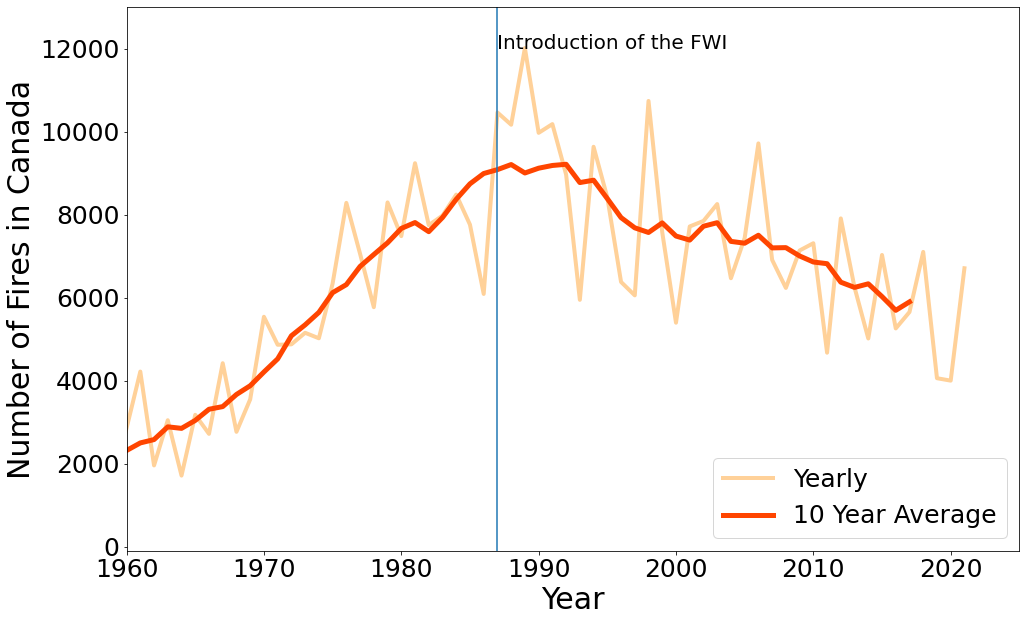

### This is actually a very interesting graph. It tells a story of successful human resistance to the forest fire problem that was growing rapidly in the 1980s. In the late 1980s, the Fire Weather Index system was developed (Van Wagner, C.E. 1987). Since then, the number of forest fires in Canada has been in steady decline - it is working! This is because the wildfire index system provides a quantitative way to understand the current forest fire risk -- it informs people on how careful they need to be and allows them to prevent human-caused ignition. 

### But what about the aspects of forest fire impact that can't be mitigated by simply reducing human-caused ignition? The number of fires per year is an indication of the number of fires that get ignited, but not an indication of their severity. Forest fire risk also indicates the severity of fires. It is based on Temperature, relative humidity, wind speed, and 24-hour precipitation. 




#### Van Wagner, C.E. 1987. Development and structure of the Canadian Forest Fire Weather Index System. Forestry Technical Report 35, Petawawa National Forestry Institute, Canadian Forestry Service, Ottawa, Ont. 48pp.

In [10]:
canada_average_temp_data  =  pd.read_csv("Temperature-change-annual-en.csv").dropna()
canada_average_temp_data["Year"] = canada_average_temp_data["Year"].astype(int)
canada_average_temp_data=canada_average_temp_data.rename({"Temperature departure (degree Celsius)":"deltaT"},axis = 1)[["Year","deltaT"]]

canada_aqi = pd.read_csv("canada_aqi.csv",encoding='unicode_escape')
canada_aqi=canada_aqi.rename({"Fine particulate matter average concentration (percentage change from 2005 level)":'fineParticulate'},axis = 1)
canada_aqi = canada_aqi[["Year","fineParticulate"]]

#Let's make a DF for yearly national averages of various things
yearlyDF = pd.DataFrame()
yearlyDF["year"] = df.groupby("YEAR").count().index
yearlyDF["nfires"] = df.groupby("YEAR").count()["FID"].values

#Add in the average temp data
yearlyDF=yearlyDF.set_index('year').join(canada_average_temp_data.set_index("Year"),rsuffix = "R")

#Add in the average AQI Data
yearlyDF=yearlyDF.join(canada_aqi.set_index("Year"),rsuffix = "R")



Text(0.5, 1.0, 'since 1950 or so')

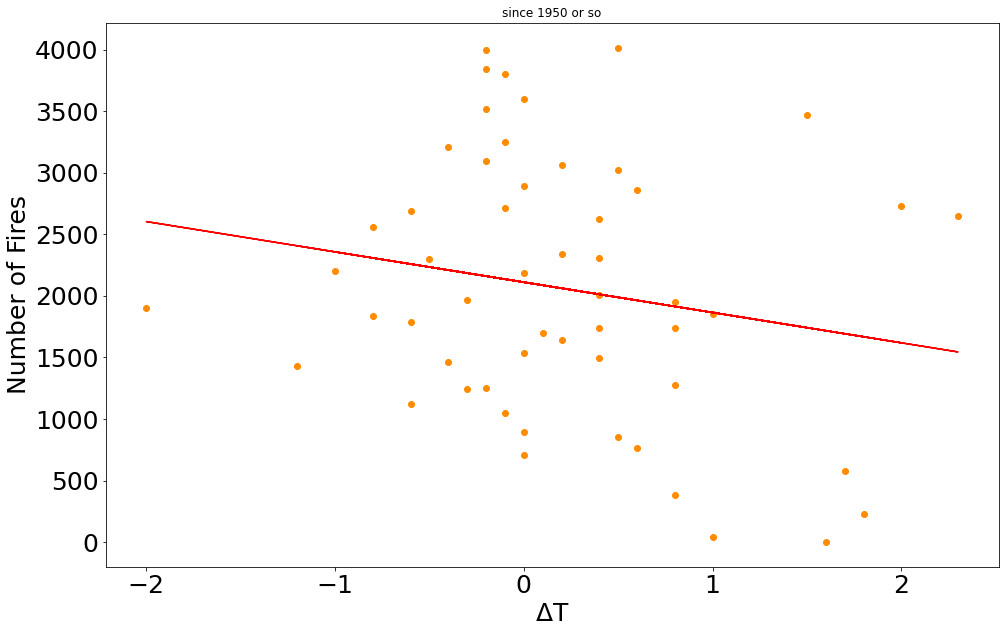

In [11]:

subdf = yearlyDF[["deltaT","nfires"]].dropna()
a = np.polyfit(subdf["deltaT"],subdf.nfires,deg = 1)



figure(figsize = (16,10))

scatter(subdf.deltaT,subdf.nfires,color = 'darkorange')
plot(subdf.deltaT,subdf.deltaT*a[0] + a[1],color = 'red')

xlabel("$\Delta$T",fontsize = 25)
ylabel("Number of Fires",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)
#plot(yearlyDF.index,yearlyDF.nfires/max(yearlyDF.nfires))

title("since 1950 or so")

### With Full data
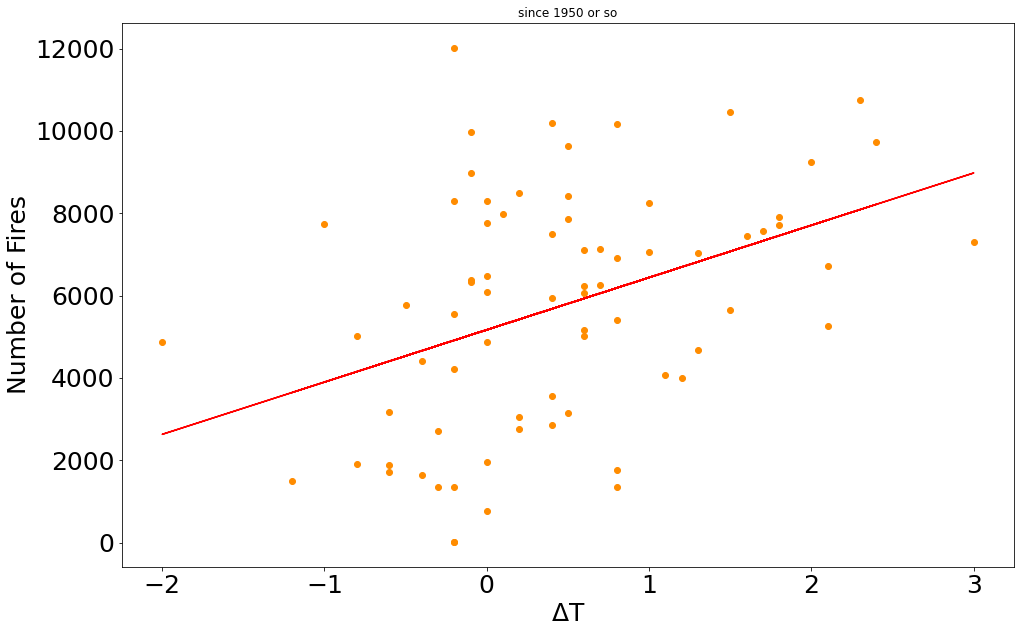

C:\Users\Liam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


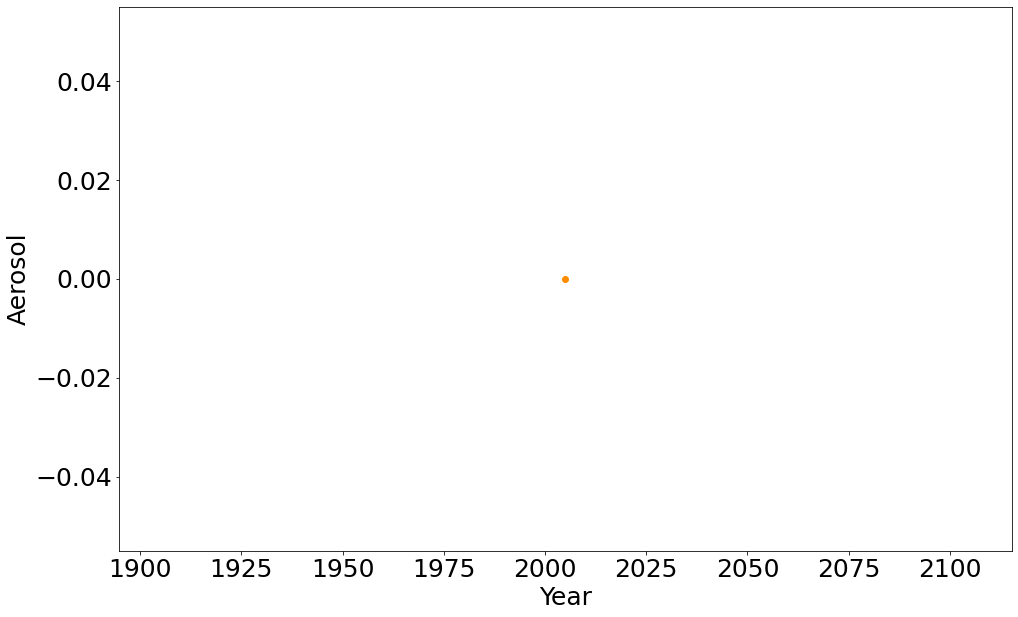

In [7]:
subdf = yearlyDF.dropna()

a = np.polyfit(subdf.index,subdf.fineParticulate,deg = 1)

figure(figsize = (16,10))

scatter(subdf.index,subdf.fineParticulate,color = 'darkorange')
plot(subdf.index,subdf.index*a[0] + a[1],color = 'red')

xlabel("Year",fontsize = 25)
ylabel("Aerosol",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)
#plot(yearlyDF.index,yearlyDF.nfires/max(yearlyDF.nfires))



### With full data
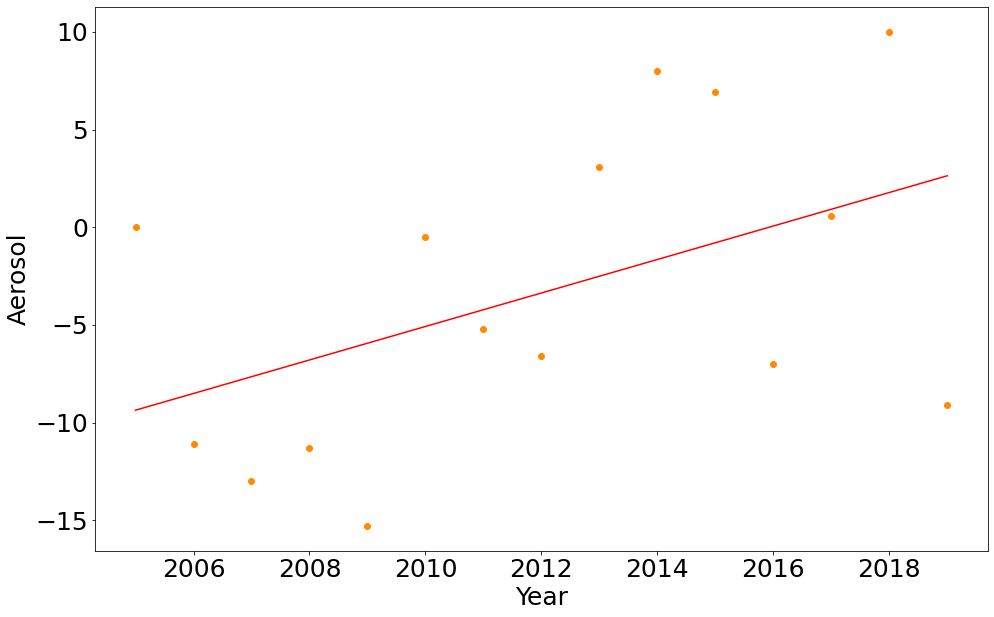

C:\Users\Liam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


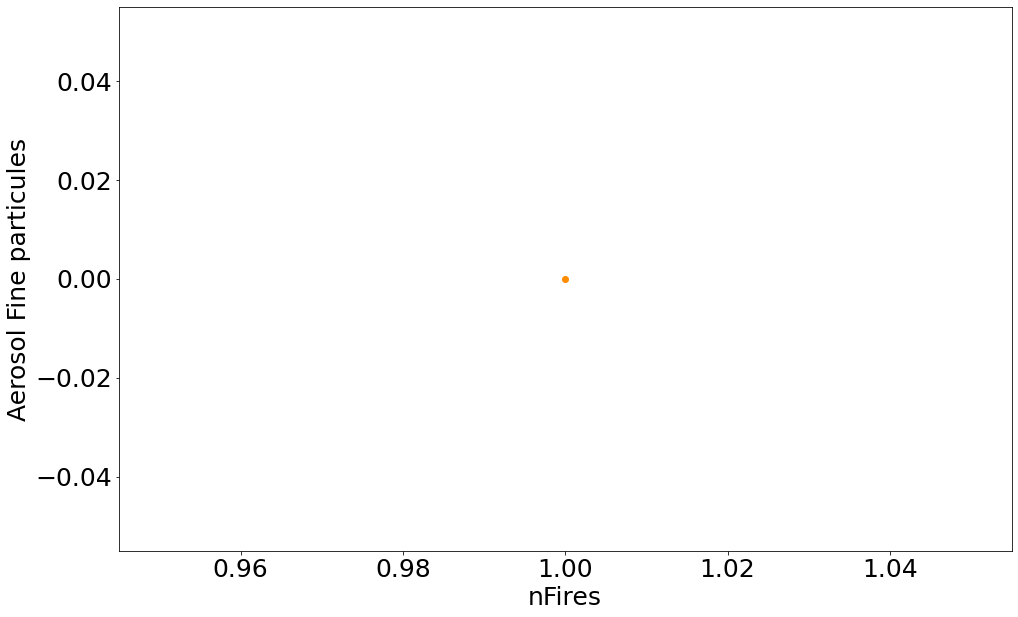

In [8]:

subdf = yearlyDF.dropna()

a = np.polyfit(subdf.nfires,subdf.fineParticulate,deg = 1)

figure(figsize = (16,10))

scatter(subdf.nfires,subdf.fineParticulate,color = 'darkorange')
plot(subdf.nfires,subdf.nfires*a[0] + a[1],color = 'red')

xlabel("nFires",fontsize = 25)
ylabel("Aerosol Fine particules",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)
#plot(yearlyDF.index,yearlyDF.nfires/max(yearlyDF.nfires))



### With full data
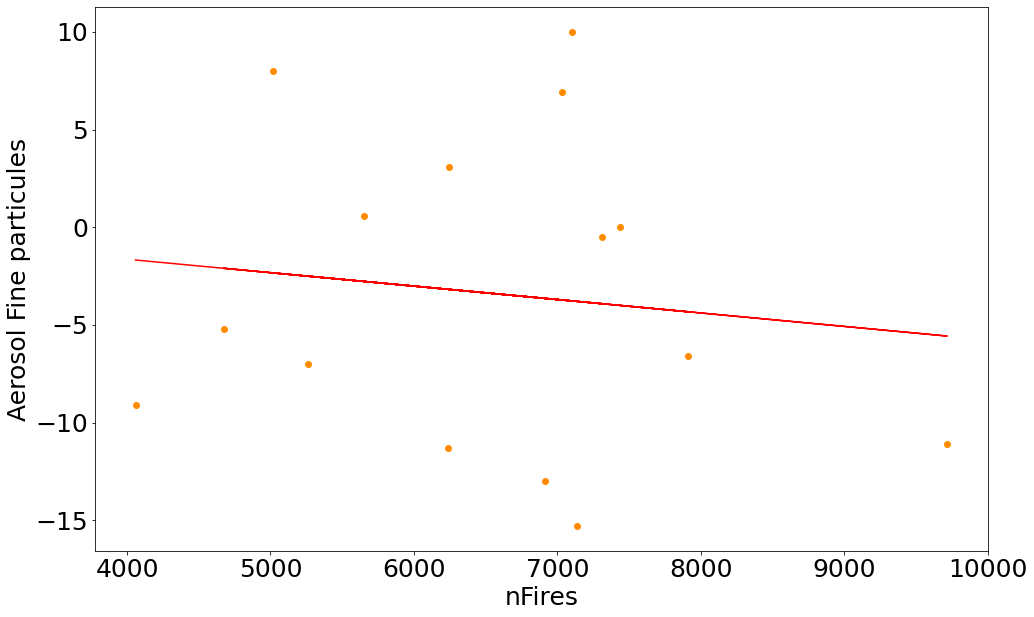